In [ ]:
import fit_classes as fp
import numpy as np
import os
from scipy.interpolate import interp1d
from scipy import optimize

errors = []
ERROR = 2 # Error in mV

class DataPlus(fp.Data):
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        def sinus_model(params, x):
            A,f,phi,c = params
            return A*np.sin(2*np.pi*f*x + phi) + c
        
        A, f, phi, c = 100, 0.006, -13.06097, 25
        A = (np.abs(max(self.y)) + np.abs(min(self.y)))/2
        c = (max(self.y) + min(self.y))/2

        f_interp = interp1d(self.x, self.y, kind='cubic')
        x_dense = np.linspace(self.x.min(), self.x.max(), 1000)
        y_dense = f_interp(x_dense)

        crossings = []
        for i in range(len(x_dense)-1):
            if (y_dense[i] - c) * (y_dense[i+1] - c) < 0:  # Sign change
                # Refine crossing with brentq
                root = optimize.brentq(lambda x_val: f_interp(x_val) - c, x_dense[i], x_dense[i+1])
                crossings.append(root)
                # punt
                # if self.x[list(self.x).index(punt) - 5] > self.x[list(self.x).index(punt) + 5]:
                #     dalende_root.append(punt)

        
        # Find descending zero-crossings
        stijgende_root = []
        for i in range(len(self.y) - 2):
            if (self.y[i - 1] + self.y[i - 2])/2 < c and (self.y[i + 1] + self.y[i + 2])/2 >= c and self.x[i] > 10:
                if stijgende_root != []:
                    if self.x[i] - stijgende_root[-1] > 10:
                        stijgende_root.append(self.x[i])
                else:
                    stijgende_root.append(self.x[i])
        
        crossing_count = len(crossings)
        # crossing_count = crossing_count if crossing_count < 30 else 30
        f = 0.00101048 if abs(len(crossings) - 21) < abs(len(crossings) - 80) else 0.00239959
        phi  = -(stijgende_root[0]*f)*2*np.pi

        # phi = np.arcsin(self.x[0] / A)

        FIT_POINTS = 400

        self.x = self.x[:FIT_POINTS][::3]
        self.y = self.y[:FIT_POINTS][::3]
        self.dx = self.dx[:FIT_POINTS][::3]
        self.dy = self.dy[:FIT_POINTS][::3]

        self.fit = self.fit(sinus_model, initial_guess=(A, f, phi, c))
        self.fit.init = A, f, phi, c


        self.A, self.f, self.phi, self.c = self.fit.minima

def data_from_file(file):
    file_path = os.path.join(os.path.dirname(os.path.abspath(os.getcwd())), file)
    data = np.genfromtxt(file_path, delimiter=",", skip_header=9)
    x = data[:, 0].astype(int)
    y = data[:, 1]
    mask = np.concatenate(([True], y[1:] != y[:-1]))
    x = x[mask]
    y = y[mask]

    dy = ERROR*np.ones_like(y)
    return DataPlus(x, y, dy, name=file_path)
        
def get_lowest_folders(root):
    lowest_folders = []
    for dirpath, dirnames, filenames in os.walk(root):
        if not dirnames:
            lowest_folders.append(dirpath)
    return lowest_folders

def load_data_by_folder(root):
    folder_data = {}
    total_files = 0
    for folder in get_lowest_folders(root):
        total_files += len([f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))])

    current_file = 0
    for folder in get_lowest_folders(root):
        folder_name = os.path.basename(folder)
        data_list = []
        for file in os.listdir(folder):
            file_path = os.path.join(folder, file)
            if os.path.isfile(file_path):
                current_file += 1
                # os.system(f'echo "File: {current_file:>3}/{total_files}"')
                data_list.append(data_from_file(file_path))
        
        if data_list:
            folder_data[folder_name] = np.array(data_list)
    return folder_data

data_arrays = load_data_by_folder(os.path.join(os.path.abspath(os.getcwd()), "data"))

for error in errors:
    display(f'ERROR: "{error}"')

# print(data_arrays['opgave1'][0].show())
print(f"{data_arrays['opgave1'][0].fit}")
print(f"{data_arrays['opgave1'][0].f}")
# print(f"{data_arrays['opgave1'][0].A}")
# print(f"{data_arrays['opgave1'][0].w}")
data_arrays['opgave1'][0].fit.show(size=2, fit_guess=True)
print(f"{data_arrays['opgave5_freq2'][13].fit}")
print(f"{data_arrays['opgave5_freq2'][13].f}")
data_arrays['opgave5_freq2'][13].fit.show(size=2, fit_guess=True)


opgave2_1 16
chi2_red: 194.74259882115703


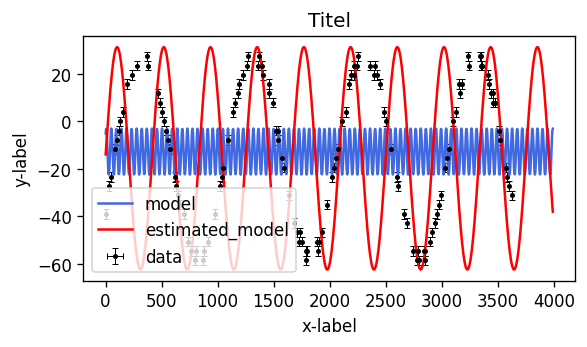

opgave2_1 17
chi2_red: 94.42081917685515


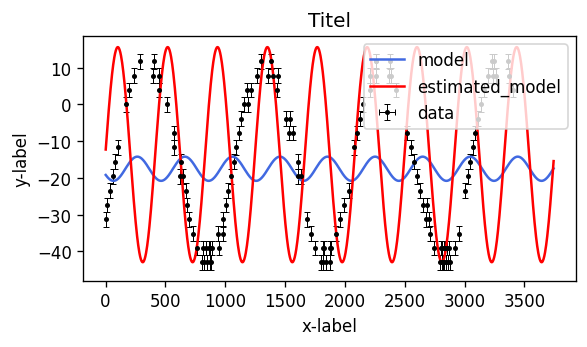

opgave2_1 21
chi2_red: 114.93117312138506


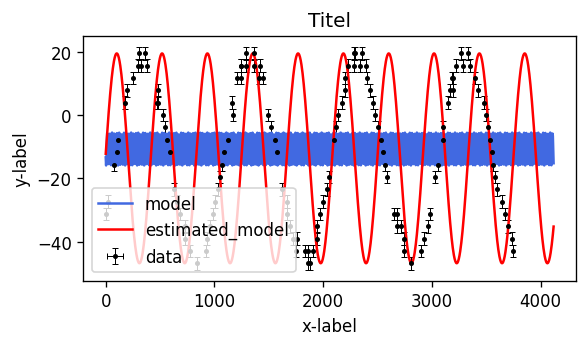

opgave2_1 22
chi2_red: 220.75129660116374


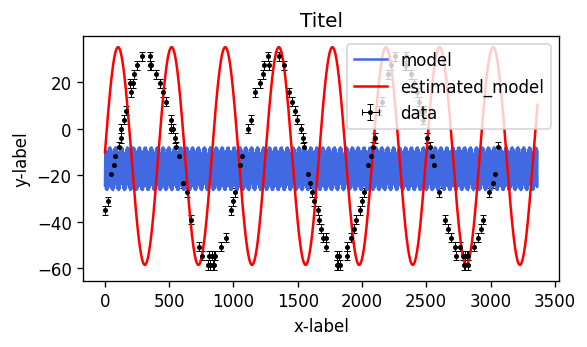

opgave2_2 9
chi2_red: 226.11658193428656


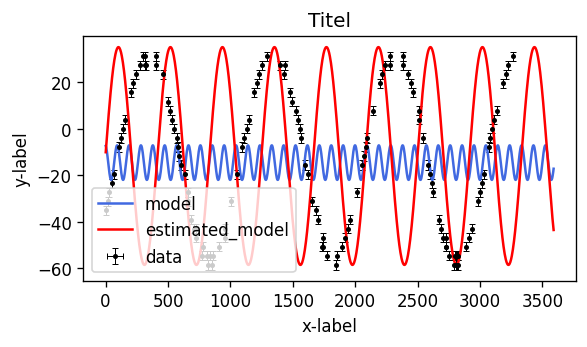

opgave2_2 11
chi2_red: 61.387676327042264


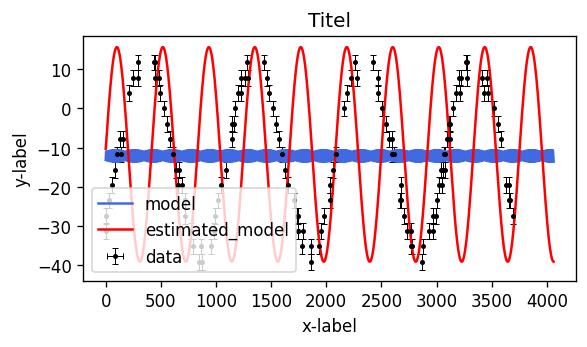

opgave2_2 26
chi2_red: 186.74748658945967


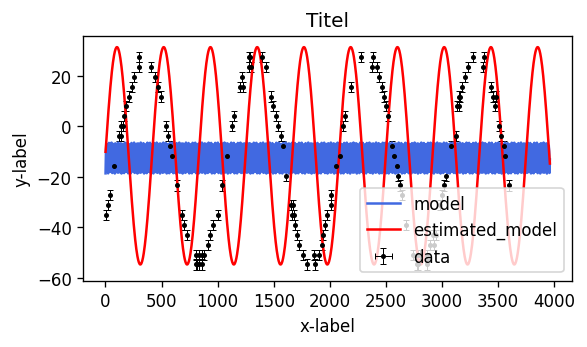

opgave2_2 28
chi2_red: 58.83538167513302


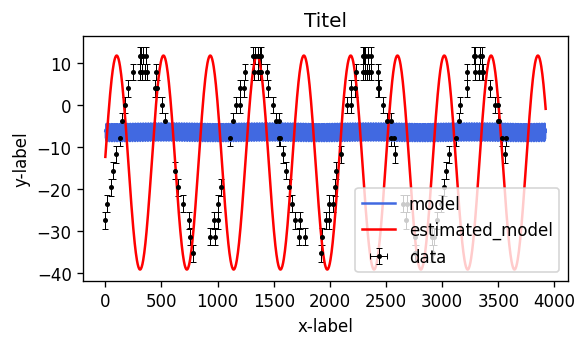

opgave2_3 6
chi2_red: 202.63803133138592


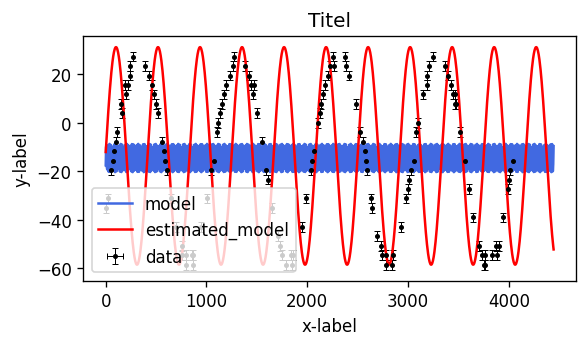

opgave2_3 19
chi2_red: 232.44209035445422


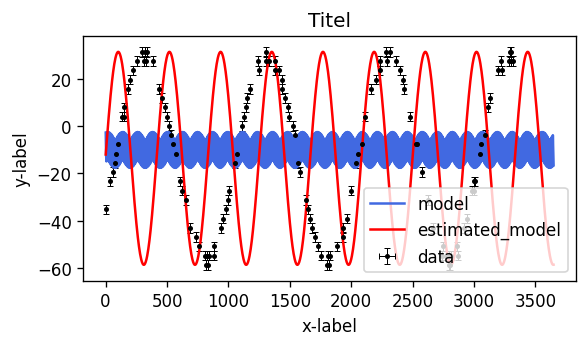

opgave2_3 29
chi2_red: 71.12692320190942


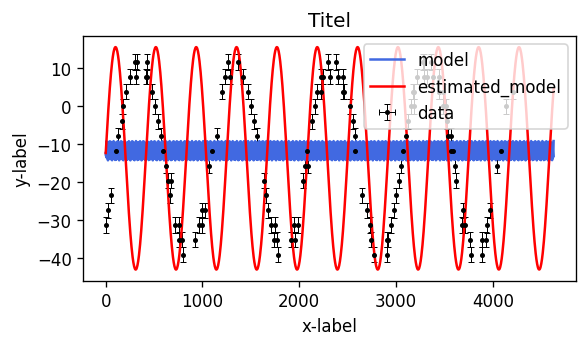

opgave2_3 30
chi2_red: 71.61374405201994


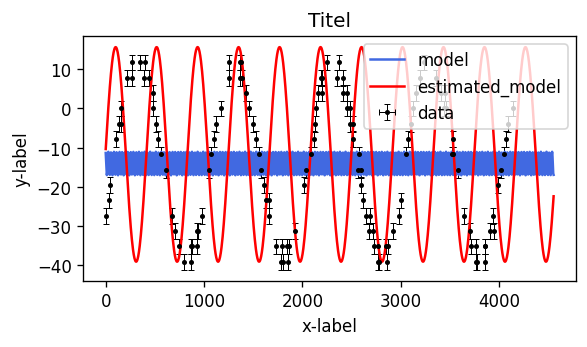

opgave3 0
chi2_red: 1306.8103121158265


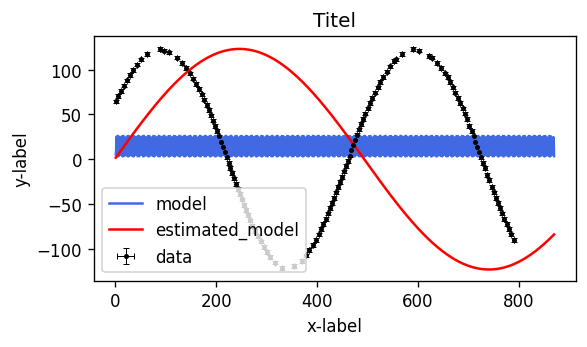

opgave3 1
chi2_red: 1309.0715159508902


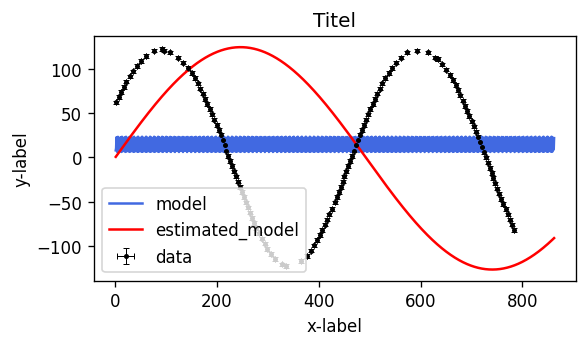

opgave3 2
chi2_red: 695.1691929877512


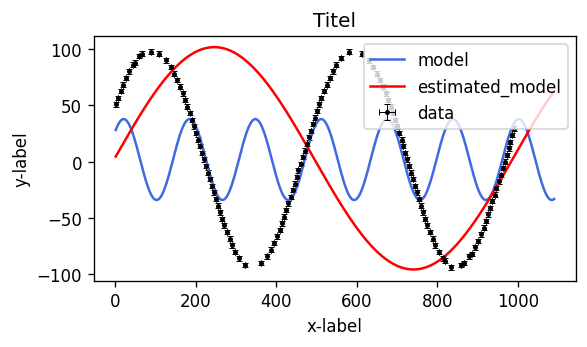

opgave3 3
chi2_red: 955.350959518899


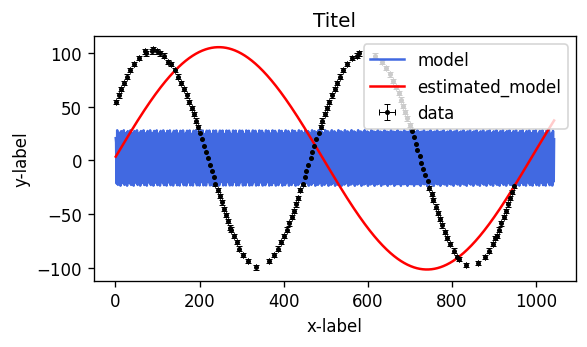

opgave3 6
chi2_red: 467.8349539472218


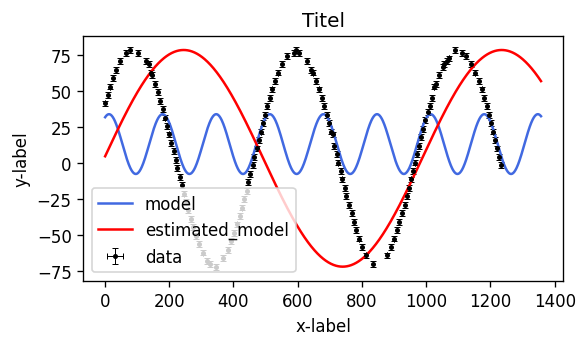

opgave4_1 0
chi2_red: 722.4000309644055


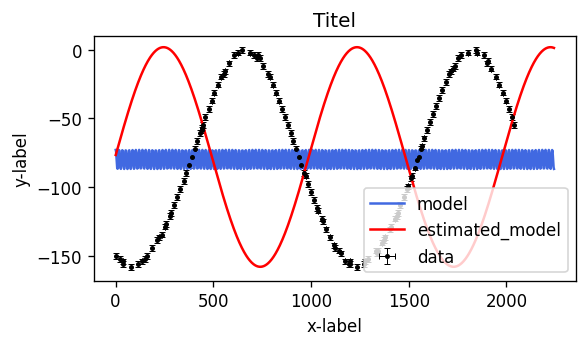

opgave4_1 1
chi2_red: 642.6705131538877


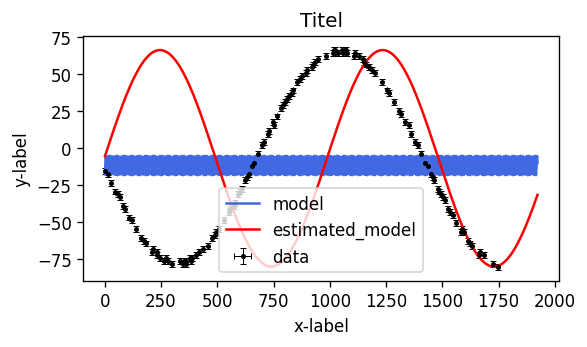

opgave4_freq1 3
chi2_red: 713.0154706452817


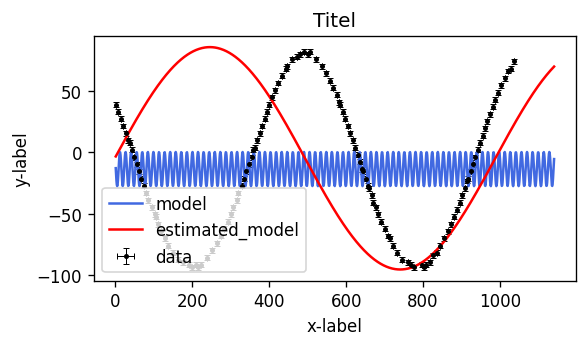

opgave4_freq1 5
chi2_red: 554.0920710443505


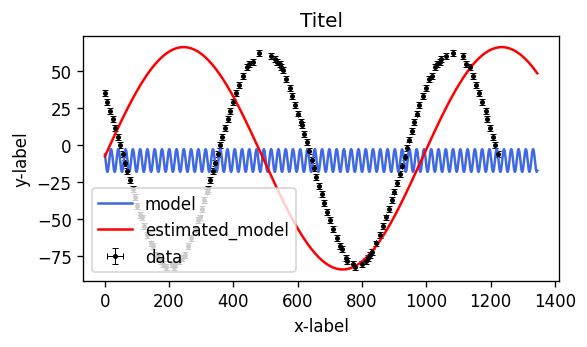

opgave4_freq1 6
chi2_red: 401.2871071319588


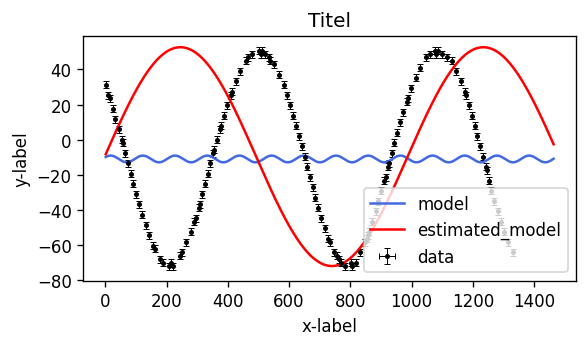

opgave4_freq1 7
chi2_red: 249.0362503157946


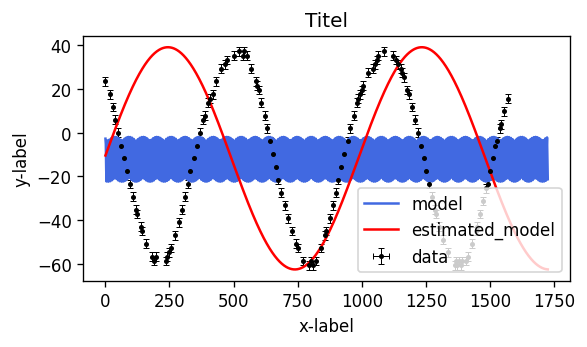

opgave4_freq1 8
chi2_red: 134.36003429854497


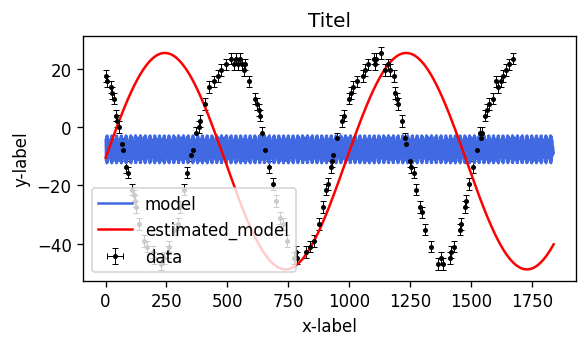

opgave4_freq1 9
chi2_red: 50.16377290889381


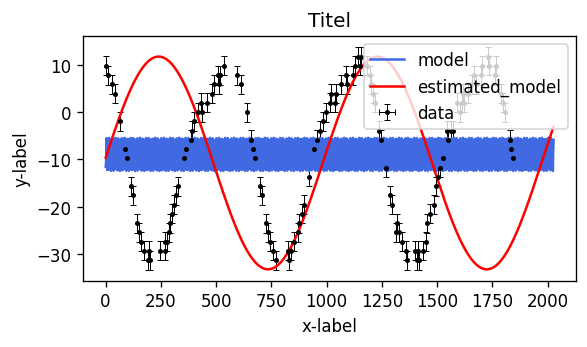

opgave4_freq1 12
chi2_red: 92.79617034152434


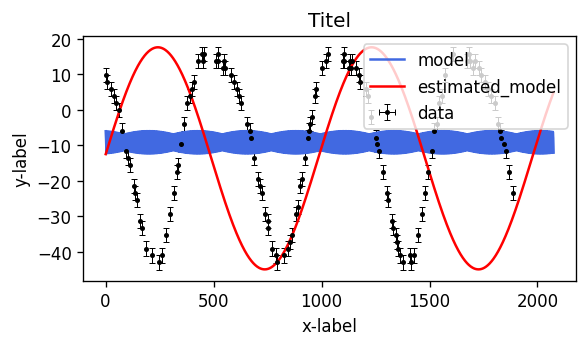

opgave4_freq1 13
chi2_red: 213.4432392247089


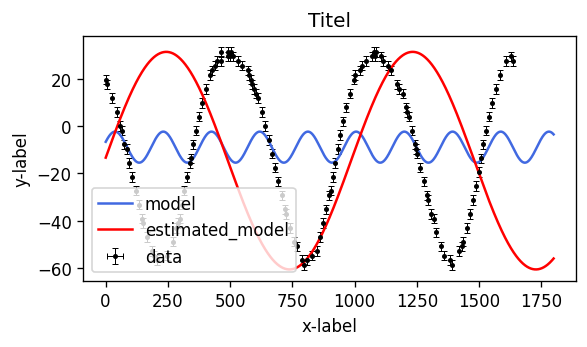

opgave4_freq1 14
chi2_red: 352.47574064672915


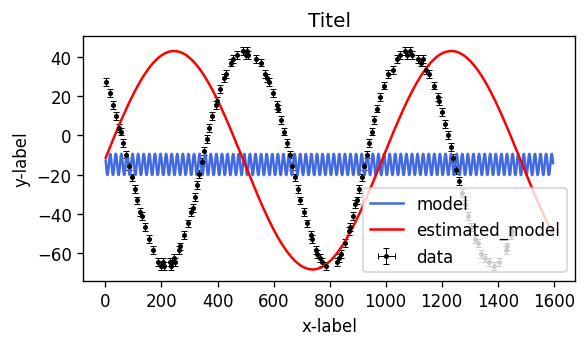

opgave4_freq1 15
chi2_red: 444.235577275843


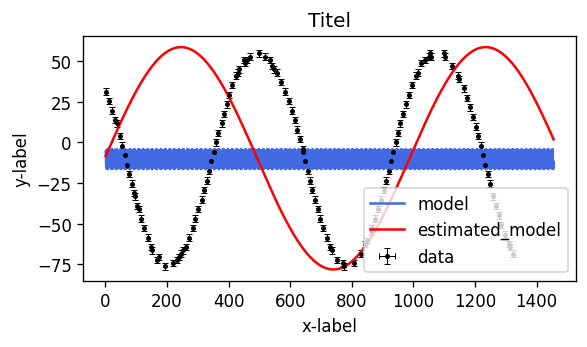

opgave4_freq1 16
chi2_red: 462.1329000026391


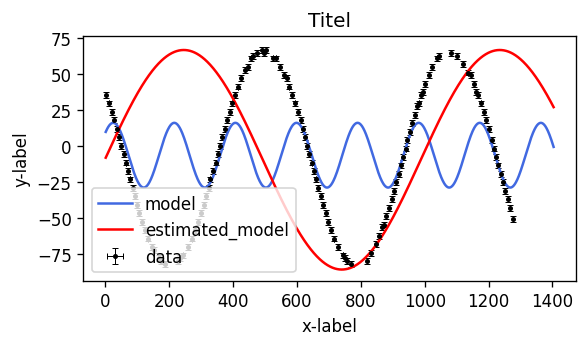

opgave4_freq2 0
chi2_red: 1352.9931522883605


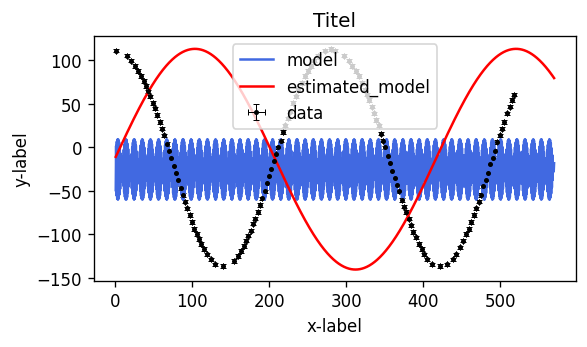

opgave4_freq2 3
chi2_red: 378.51087224311647


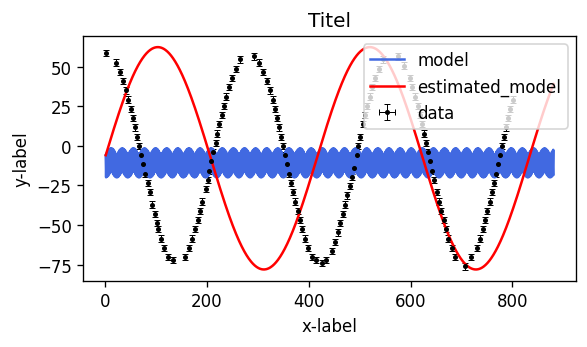

opgave4_freq2 4
chi2_red: 195.17023320265048


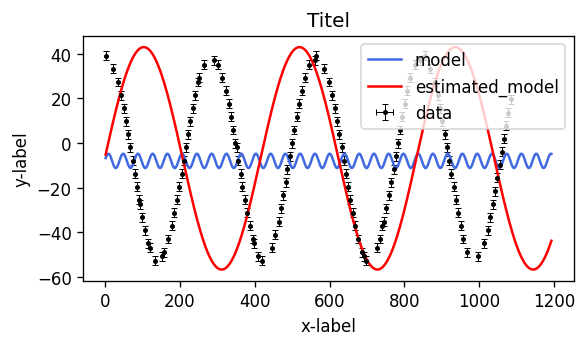

opgave4_freq2 5
chi2_red: 65.0907115578542


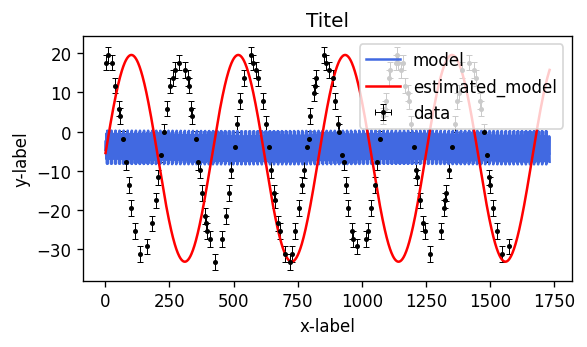

opgave4_freq2 7
chi2_red: 256.29275099178085


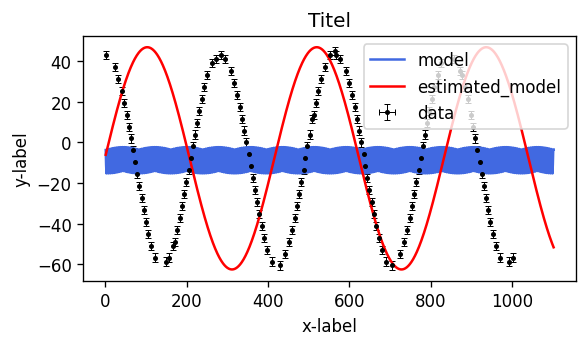

opgave4_freq2 8
chi2_red: 643.2104715098911


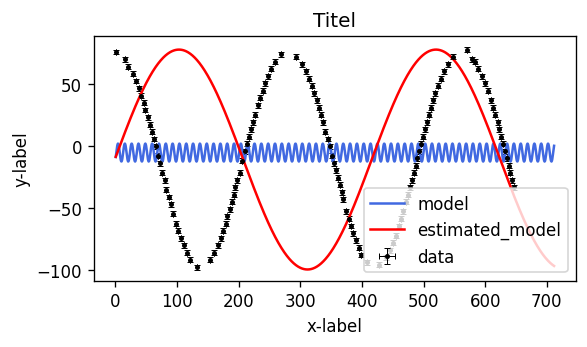

opgave4_freq2 10
chi2_red: 1318.3952670045098


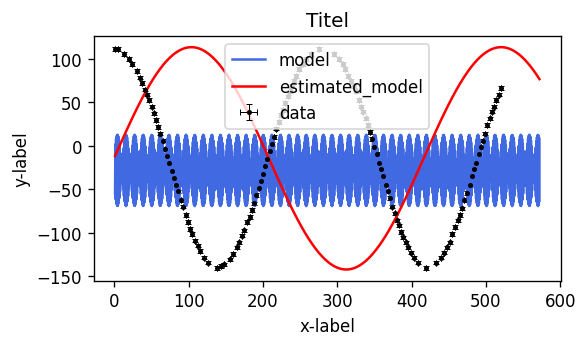

opgave4_freq2 12
chi2_red: 692.4763057899947


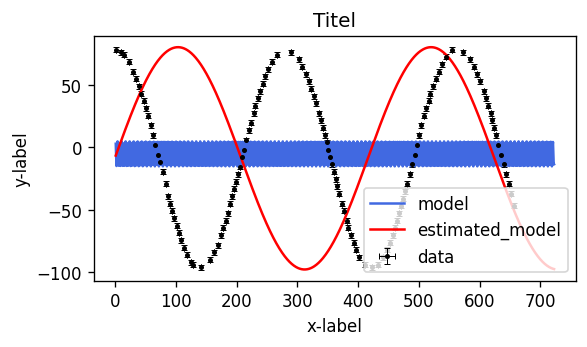

opgave4_freq2 13
chi2_red: 360.78437914724583


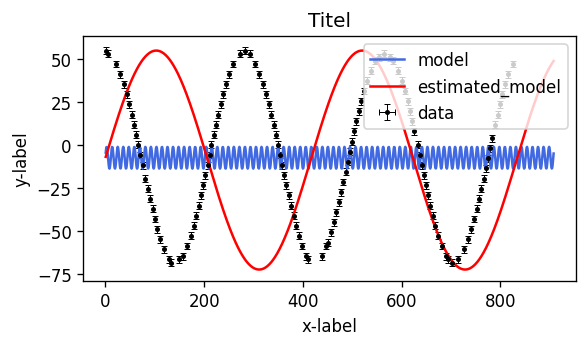

opgave4_freq2 14
chi2_red: 143.4980355326112


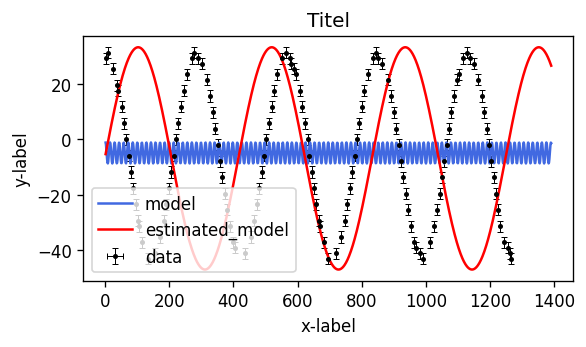

opgave4_freq2 18
chi2_red: 871.9573191760797


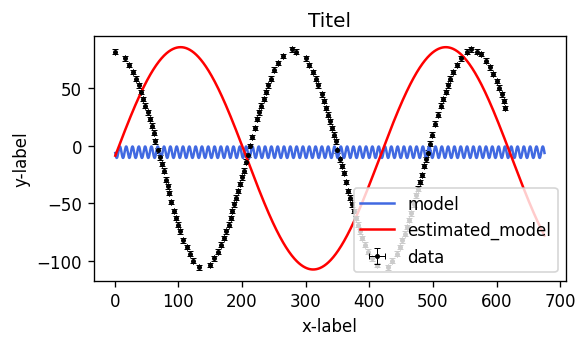

opgave5_1 1
chi2_red: 4699.79603960609


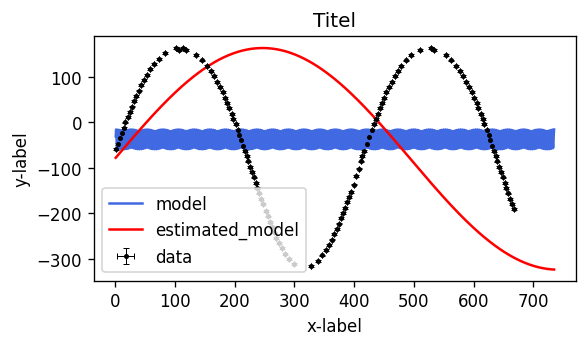

opgave5_1 2
chi2_red: 665.7825078363215


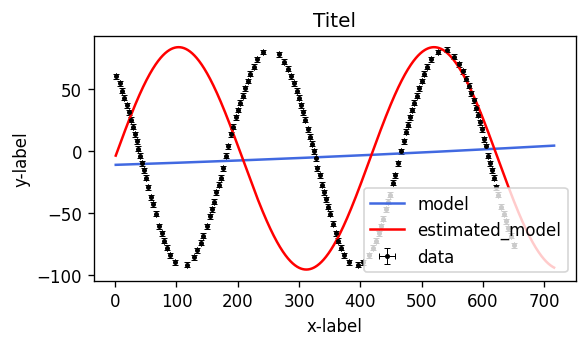

opgave5_freq1 8
chi2_red: 61.46681493161191


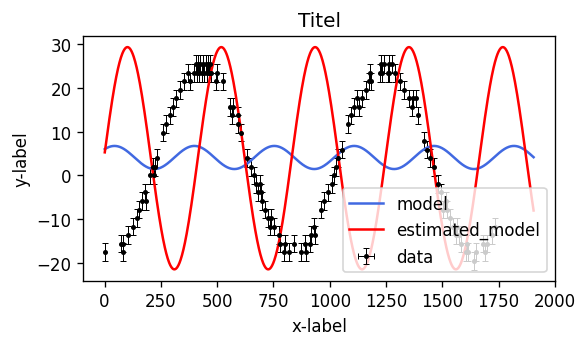

opgave5_freq1 12
chi2_red: 55.04310779363603


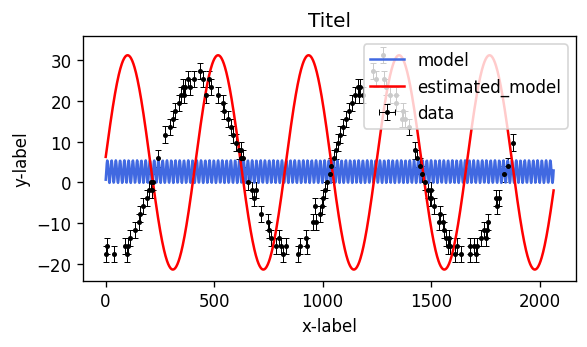

opgave5_freq1 17
chi2_red: 372.7249371896066


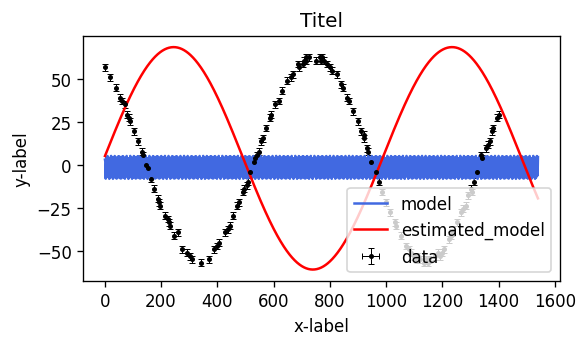

opgave5_freq2 0
chi2_red: 4296.47742770018


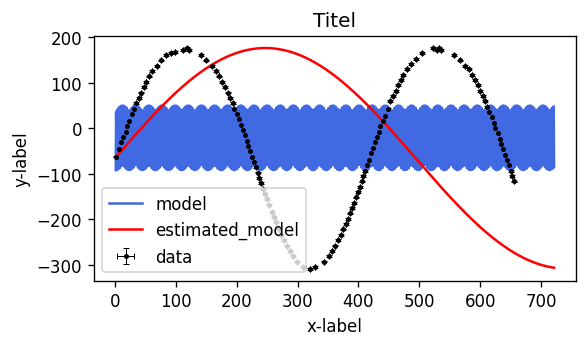

opgave5_freq2 1
chi2_red: 5740.69973855896


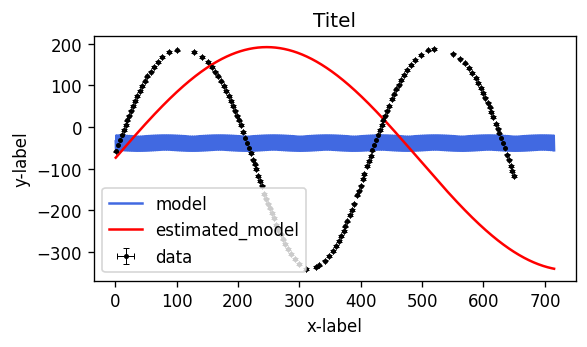

opgave5_freq2 2
chi2_red: 4268.001687666455


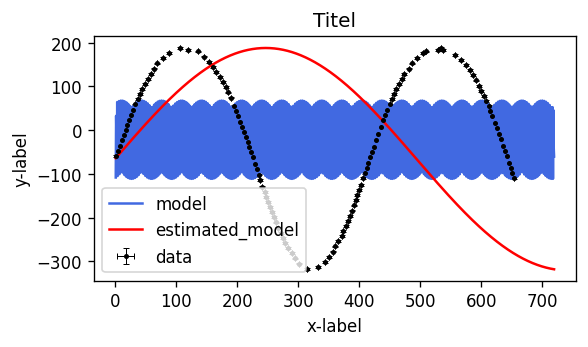

opgave5_freq2 3
chi2_red: 4084.339356727205


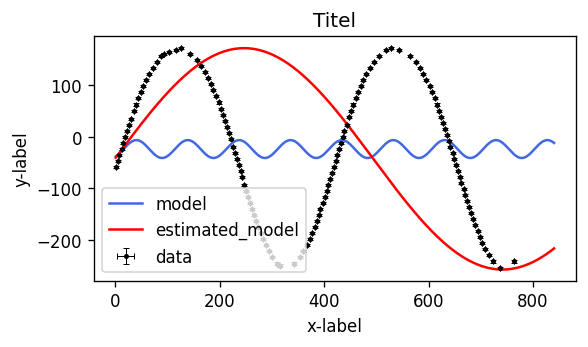

opgave5_freq2 5
chi2_red: 554.9720901751222


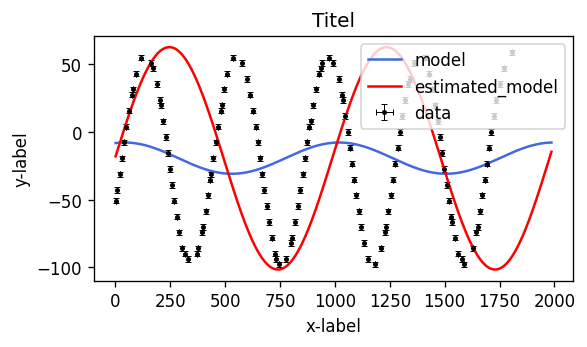

opgave5_freq2 6
chi2_red: 51.51882427058386


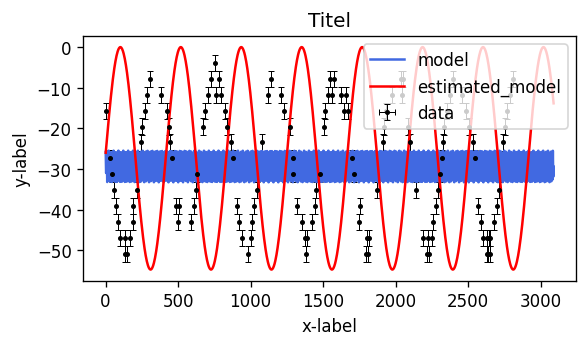

opgave5_freq2 7
chi2_red: 1118.8851521343709


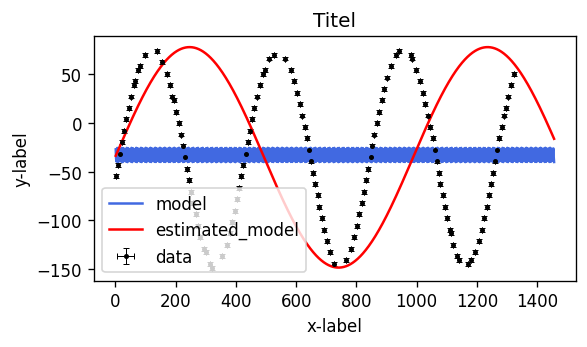

opgave5_freq2 8
chi2_red: 2760.8080763706635


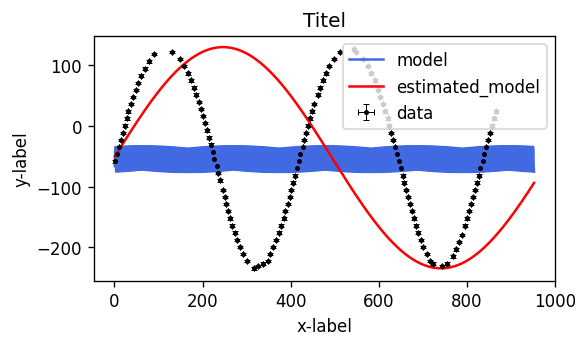

opgave5_freq2 9
chi2_red: 4581.683626452653


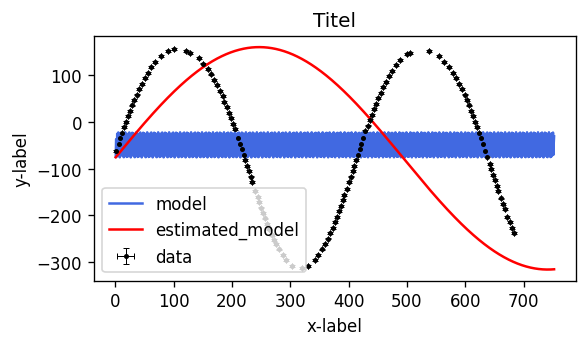

opgave5_freq2 10
chi2_red: 5650.287434338555


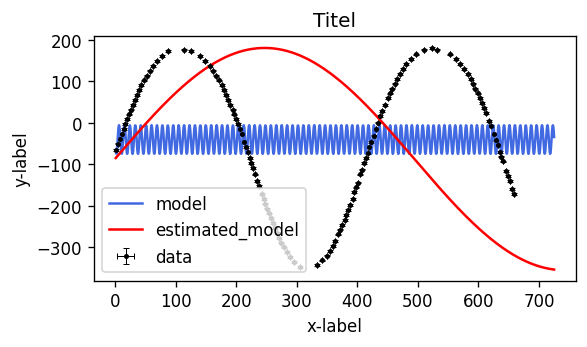

opgave5_freq2 11
chi2_red: 5933.1990039054335


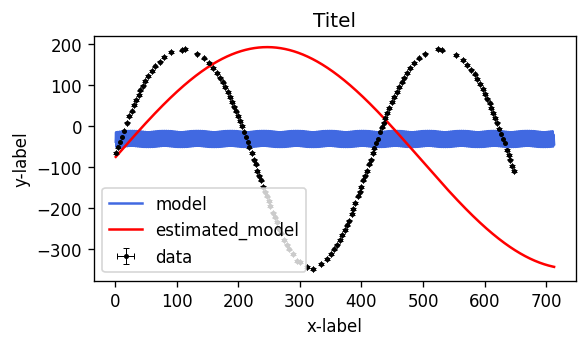

opgave5_freq2 12
chi2_red: 4466.759939534368


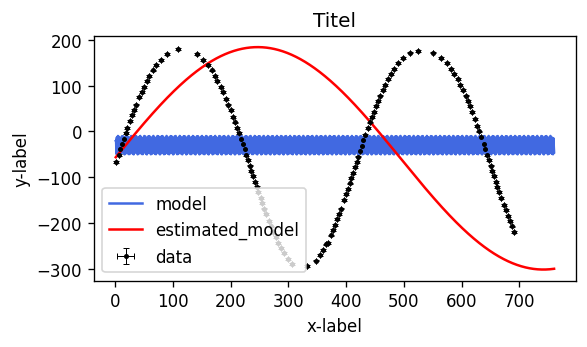

opgave5_freq2 14
chi2_red: 1349.0495182094787


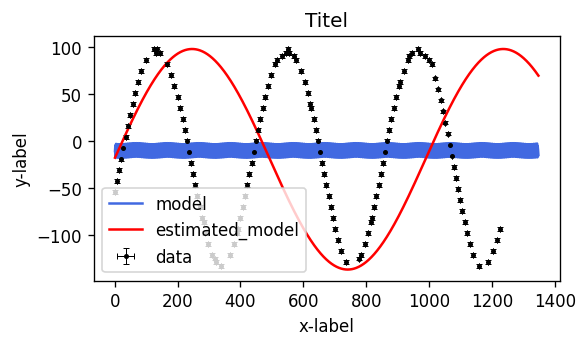

opgave5_freq2 15
chi2_red: 170.91572192534161


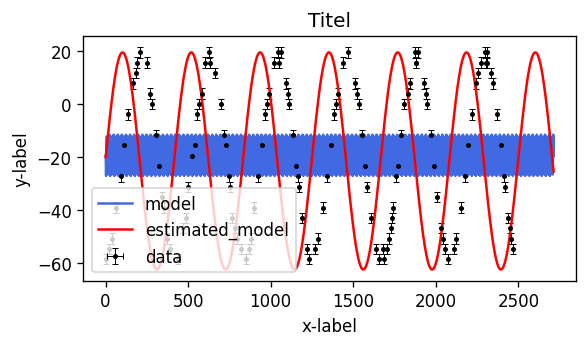

opgave5_freq2 16
chi2_red: 428.87791206503795


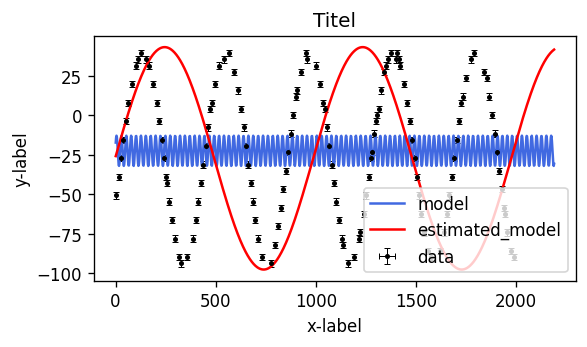

opgave5_freq2 17
chi2_red: 2118.3674470261967


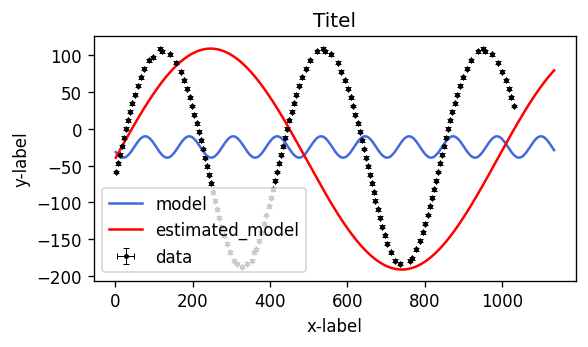

opgave5_freq2 18
chi2_red: 4032.0515289077257


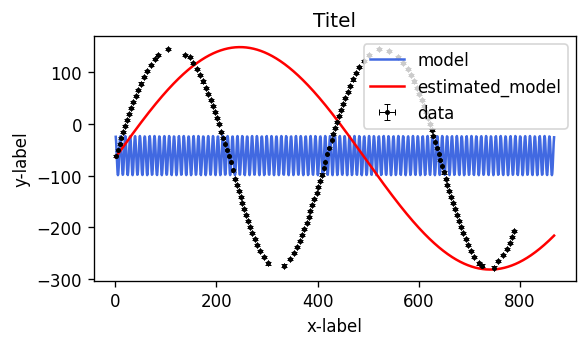

opgave5_freq3 0
chi2_red: 646.1104646731654


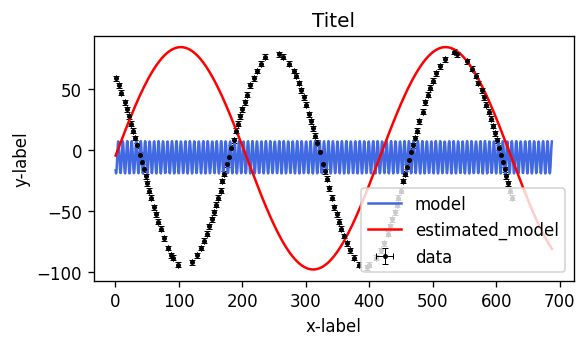

opgave5_freq3 1
chi2_red: 538.7887592997648


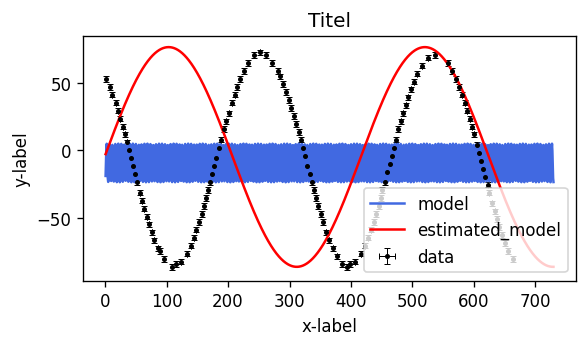

opgave5_freq3 2
chi2_red: 281.36877669420267


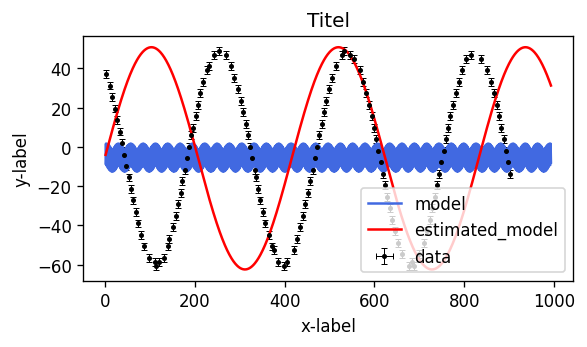

opgave5_freq3 3
chi2_red: 92.03300572377881


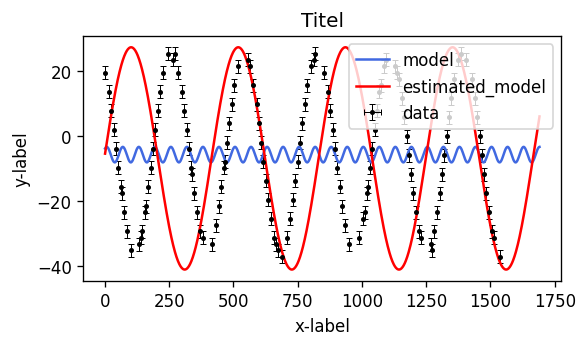

opgave5_freq3 5
chi2_red: 217.5767010146845


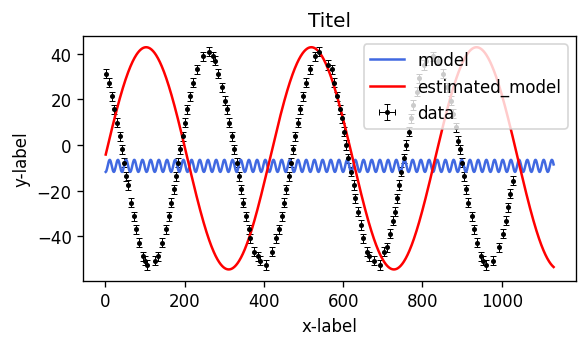

opgave5_freq3 7
chi2_red: 762.2950890591935


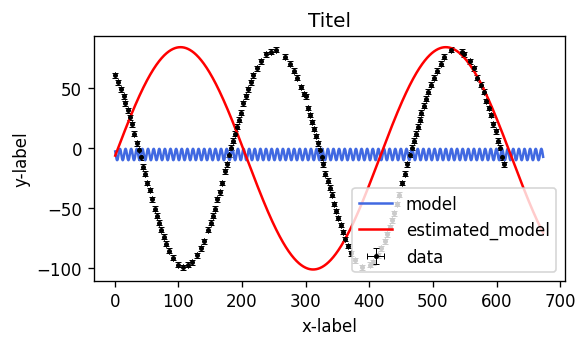

opgave5_freq3 9
chi2_red: 166.95280959870718


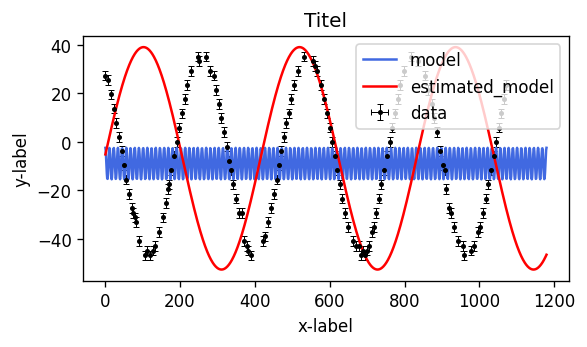

opgave5_freq3 11
chi2_red: 76.10601461952652


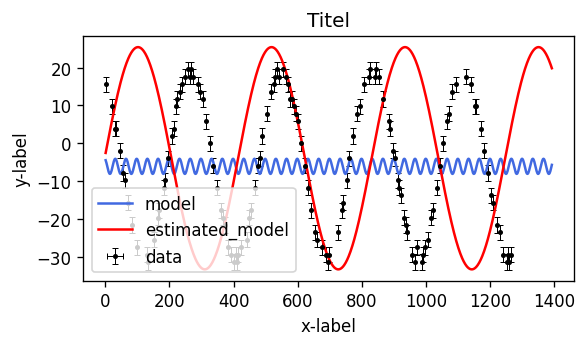

opgave5_freq3 13
chi2_red: 832.3133677429447


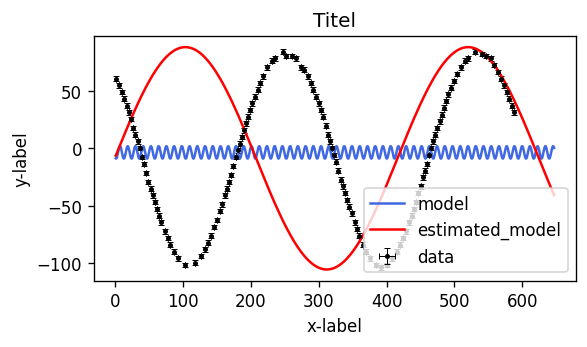

opgave5_freq3 14
chi2_red: 557.4821361766362


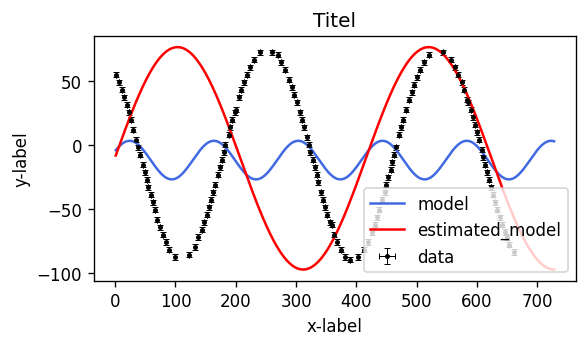

opgave5_freq3 15
chi2_red: 307.147951463778


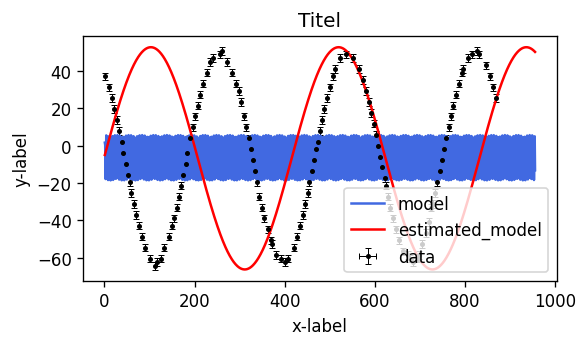

opgave5_freq3 16
chi2_red: 93.27936040134033


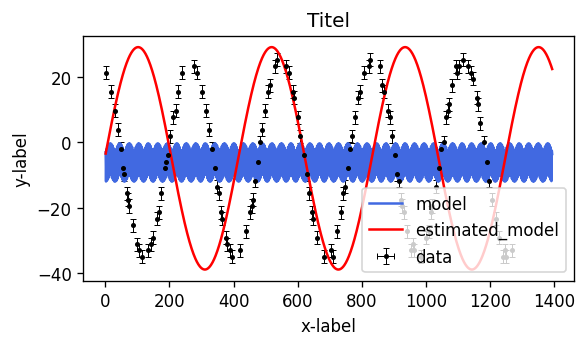

opgave5_freq3 18
chi2_red: 229.91340907461904


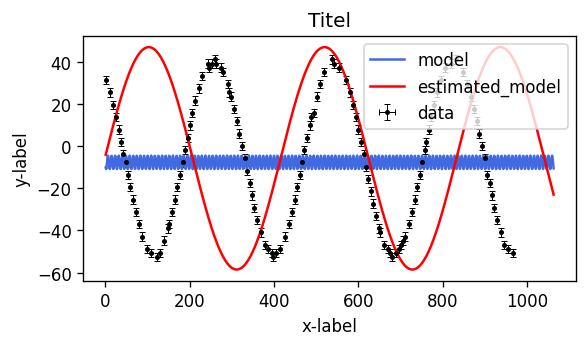

76

In [ ]:
# CAREFULL: THIS DISPLAYS 213 FITS!!!
count = 0
for key in data_arrays:
    for i in range(len(data_arrays[key])):
        if data_arrays[key][i].fit.chi2_red > 50:
            print(key, i)
            print("chi2_red:", data_arrays[key][i].fit.chi2_red)
            data_arrays[key][i].fit.show(size=2, fit_guess=True)
            count += 1
display(count)

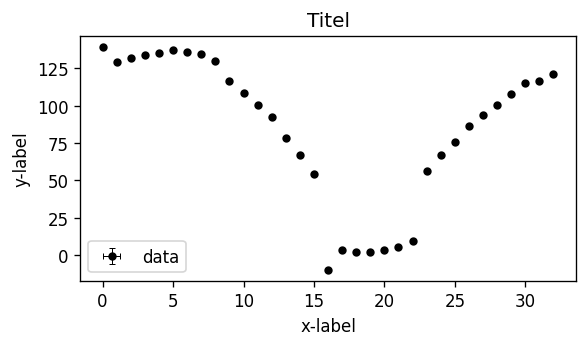

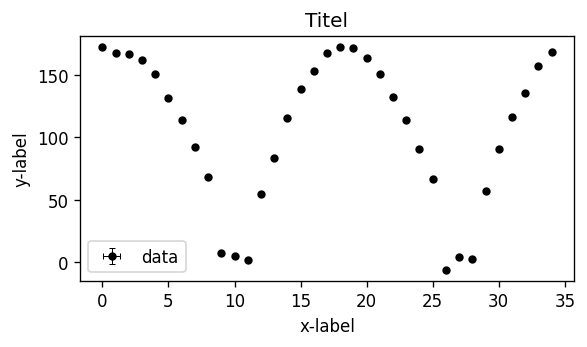

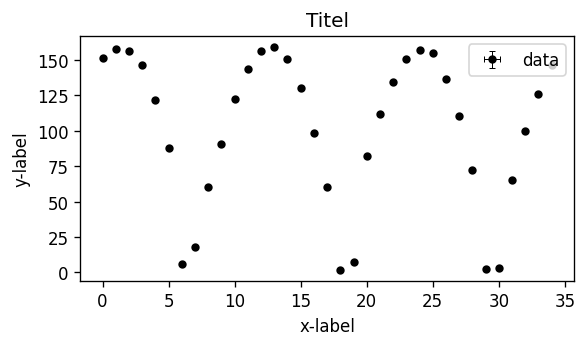

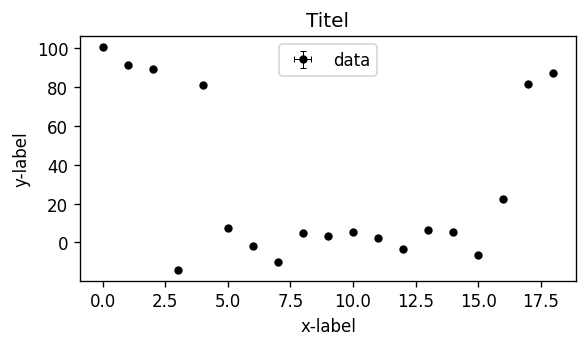

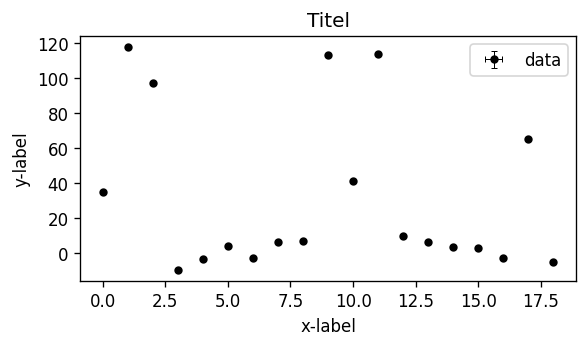

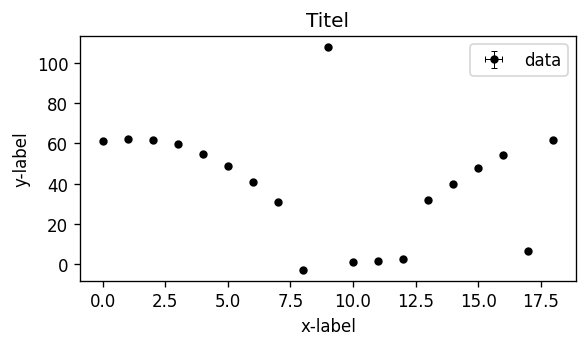

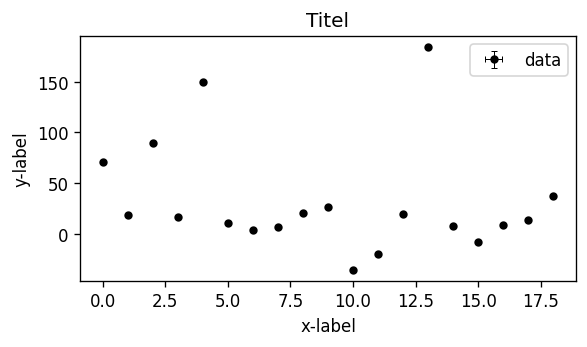

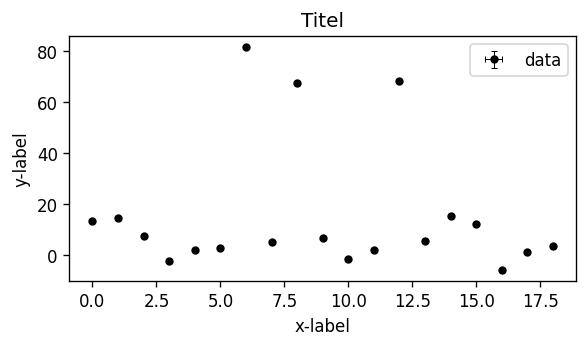

In [ ]:
def sinus_model(params, x):
    A,f,phi,c = params
    return A*np.sin(2*np.pi*f*x + phi) + c

for file in ['opgave2_1', 'opgave2_2', 'opgave2_3', 'opgave4_freq1', 'opgave4_freq2', 'opgave5_freq1', 'opgave5_freq2', 'opgave5_freq3']:
    x = [i for i in range(len(data_arrays[file]))]
    y = [data_arrays[file][i].A for i in range(len(data_arrays[file]))]
    dy = np.zeros_like(y)
    opgave2_1_A = fp.Data(x, y, dy)
    opgave2_1_A.show()